In [ ]:
# https://docs.opencv.org/3.1.0/d5/daf/tutorial_py_histogram_equalization.html

In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [11]:
from matplotlib import image as mpimg

In [37]:
img = cv2.imread('night_001.jpg',0)
img_mp = mpimg.imread('night_001.jpg',0)

In [5]:
hist,bins = np.histogram(img.flatten(),256,[0,256])

In [6]:
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

In [24]:
def visualize_image(img_mp):
    plt.figure(figsize=(20,5))

    plt.subplot(121)
    plt.axis("off")
    plt.imshow(img_mp)

    plt.subplot(122)
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(),256,[0,256], color = 'r')
    plt.xlim([0,256])
    plt.legend(('cdf','histogram'), loc = 'upper left')

    plt.show()

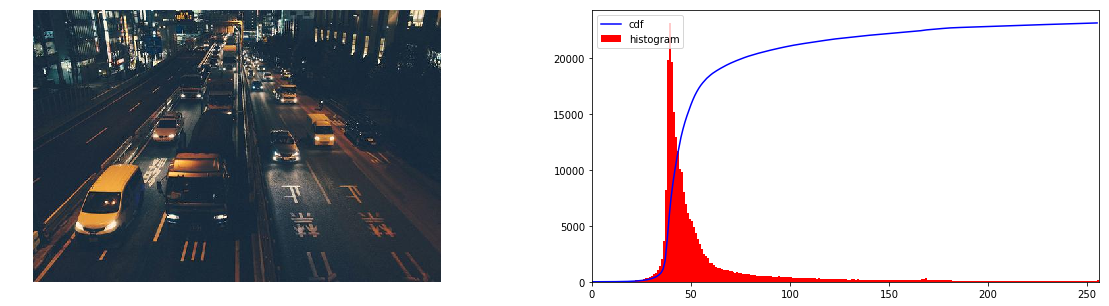

In [25]:
visualize_image(img_mp)

In [22]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

In [29]:
img2 = cdf[img]

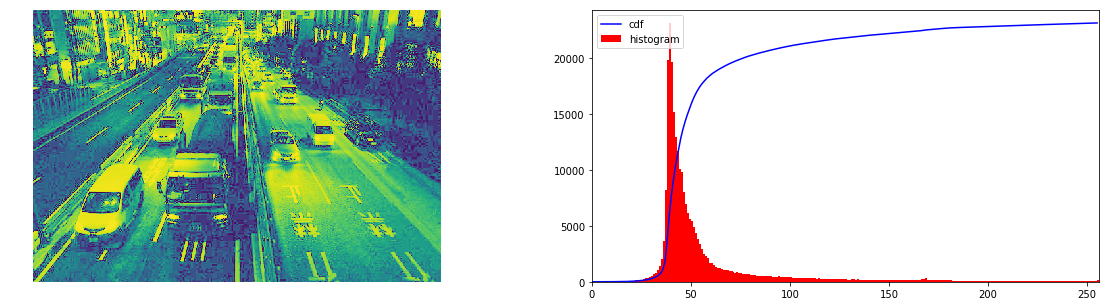

In [30]:
visualize_image(img2)

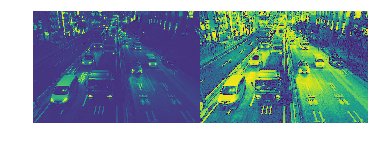

In [43]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.axis("off")
plt.imshow(res)

In [45]:
cv2.imwrite('night_001_histeq.jpg',res)

True